# BUILDING DEUTSCH ALG


In [6]:
# Use Braket SDK Cost Tracking to estimate the cost to run this example
from braket.tracking import Tracker
t = Tracker().start()

In [7]:
# general imports
import matplotlib.pyplot as plt
%matplotlib inline

# AWS imports: Import Braket SDK modules
from braket.circuits import Circuit, Gate, Instruction, circuit, Observable
from braket.devices import LocalSimulator
from braket.aws import AwsDevice
import numpy as np

# Defining f(x)

In [8]:
f = np.array([0,0])
f[0] = 1
f[1] = 1
print(f)

[1 1]


In [9]:
@circuit.subroutine(register=True)
def U_f (f,target):
    U_f = np.zeros([4,4])
    a = ((0,1,2,3), (f[0],int(not(f[0])) ,(2 + f[1]) , (2+int(not(f[1])))))
    U_f[a] = 1

    print(U_f)

    circ = Circuit()
    circ.unitary(matrix = U_f, targets = target)
    return circ

#debug
U_f(f, range(2))


[[0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]]


Circuit('instructions': [Instruction('operator': Unitary('qubit_count': 2), 'target': QubitSet([Qubit(0), Qubit(1)]))])

In [10]:
deutsch = Circuit().x([1]).h(range(2)).U_f(f,range(2)).h(range(2))
print(deutsch)
print ('circ depth is' ,deutsch.depth)
# get qubit number
qubit_count = deutsch.qubit_count
qubit_count

[[0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]]
T  : |0|1|2|3|
              
q0 : -H---U-H-
          |   
q1 : -X-H-U-H-

T  : |0|1|2|3|
circ depth is 4


2

# Simulation

In [11]:
#device = LocalSimulator()
device = AwsDevice("arn:aws:braket:::device/quantum-simulator/amazon/sv1")

In [12]:
# run circuit
q_task = device.run(deutsch, shots=100)
result = q_task.result()
# get measurement shots
counts = result.measurement_counts
# print counts
print(counts)

Counter({'01': 100})


Text(0, 0.5, 'counts')

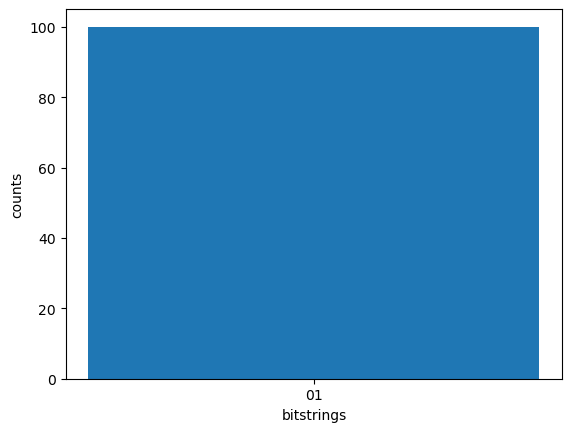

In [13]:
# plot using Counter
plt.bar(counts.keys(), counts.values())
plt.xlabel('bitstrings')
plt.ylabel('counts')

In [14]:
print(t.quantum_tasks_statistics())
print(t.qpu_tasks_cost())
print(t.simulator_tasks_cost())

{'arn:aws:braket:::device/quantum-simulator/amazon/sv1': {'shots': 100, 'tasks': {'COMPLETED': 1}, 'execution_duration': datetime.timedelta(microseconds=8000), 'billed_execution_duration': datetime.timedelta(seconds=3)}}
0
0.0037500000


# esempio da mandare alle QPU
Usiamo la funzione f(0) = 0 f(1) = 1

In [15]:
deutsch = Circuit().x([1]).h(range(2)).cnot(control=0,target=1).h(range(2))
#q1 inizializzato a 0
print(deutsch)
print ('circ depth is' ,deutsch.depth)
# get qubit number
qubit_count = deutsch.qubit_count
qubit_count

T  : |0|1|2|3|
              
q0 : -H---C-H-
          |   
q1 : -X-H-X-H-

T  : |0|1|2|3|
circ depth is 4


2

# Simulation

In [16]:
device = LocalSimulator()
#device = AwsDevice("arn:aws:braket:eu-west-2::device/qpu/oqc/Lucy")

In [17]:
# run circuit
q_task = device.run(deutsch, shots=100)


In [18]:
print("Task Status:", q_task.state())

Task Status: COMPLETED


Counter({'11': 100})


Text(0, 0.5, 'counts')

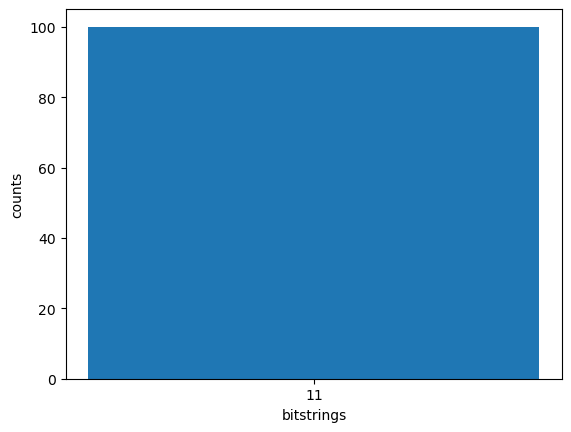

In [19]:
result = q_task.result()
# get measurement shots
counts = result.measurement_counts
# print counts
print(counts)

# plot using Counter
plt.bar(counts.keys(), counts.values())
plt.xlabel('bitstrings')
plt.ylabel('counts')

In [18]:
print(t.quantum_tasks_statistics())
print(t.qpu_tasks_cost())
print(t.simulator_tasks_cost())

{'arn:aws:braket:eu-west-2::device/qpu/oqc/Lucy': {'shots': 100, 'tasks': {'COMPLETED': 1}}}
0.3350000000
0
